# Proyek Analisis Data: [Bike_Sharing_Dataset]
- **Nama:** [Faris Nur Rizqiawan]
- **Email:** [farisnur07@gmail.com]
- **ID Dicoding:** [farisrizqiawan]

## Menentukan Pertanyaan Bisnis

- Bagaimana penggunaan sepeda tiap musim?
- Bagaimana peminjaman sepeda pada pengguna Casual dan Registered?


## Import Semua Packages/Library yang Digunakan

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [42]:
day_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Visdat_DBS/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [43]:
hour_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Visdat_DBS/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Memperoleh informasi lengkap dari data Day dan Hour

### Assessing Data

### Menilai table day

In [44]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [45]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [46]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [47]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai table hour

In [48]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [49]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [50]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [51]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Table sudah dinilai dan tidak terindikasi duplikasi


### Cleaning Data

Data sudah clean

## Exploratory Data Analysis (EDA)

### Explore table day

In [52]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
693,694,2012-11-24,4,1,11,0,6,0,1,0.278333,0.248742,0.404583,0.376871,532,1745,2277
367,368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236
713,714,2012-12-14,4,1,12,0,5,1,1,0.281667,0.294192,0.642917,0.131229,429,5182,5611
706,707,2012-12-07,4,1,12,0,5,1,2,0.320833,0.321958,0.764167,0.130600,349,4659,5008
589,590,2012-08-12,3,1,8,0,0,0,1,0.700833,0.644579,0.530417,0.122512,2182,4362,6544


In [53]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [54]:
day_df.groupby("season").agg(
    unique_days=("instant", "nunique"),
    min_temp=("temp", "min"),
    max_atemp=("atemp", "max"),
    total_casual=("casual", "sum"),
    total_registered=("registered", "sum"),
    total_rides=("cnt", "sum")
)

,unique_days,min_temp,max_atemp,total_casual,total_registered,total_rides
season,,,,,,
1,181,0.059130,0.548617,60622,410726,471348
2,184,0.253043,0.757579,203522,715067,918589
3,188,0.469167,0.840896,226091,835038,1061129
4,178,0.220833,0.607975,129782,711831,841613


In [55]:
day_df.groupby("holiday").agg({
    "instant": "count",
    "temp": ["min", "max", "mean"],
    "atemp": ["min", "max"],
    "cnt": ["sum", "mean"]
})


instant      temp                         atemp                cnt  \
          count       min       max      mean       min       max      sum   
holiday                                                                      
0           710  0.059130  0.861667  0.496283  0.079070  0.840896  3214244   
1            21  0.175833  0.789167  0.465012  0.176771  0.732337    78435   

                      
                mean  
holiday               
0        4527.104225  
1        3735.000000

In [56]:
day_df.groupby("casual").agg({
    "instant": "count",
    "temp": ["min", "max", "mean"],
    "atemp": ["min", "max"],
    "cnt": ["sum", "mean"]
})

instant      temp                         atemp             cnt        
         count       min       max      mean       min       max   sum    mean
casual                                                                        
2            1  0.440000  0.440000  0.440000  0.439400  0.439400    22    22.0
9            2  0.216667  0.243333  0.230000  0.220333  0.232333  1124   562.0
15           1  0.195000  0.195000  0.195000  0.219700  0.219700   431   431.0
25           1  0.172727  0.172727  0.172727  0.160473  0.160473  1162  1162.0
34           1  0.217500  0.217500  0.217500  0.203600  0.203600   506   506.0
...        ...       ...       ...       ...       ...       ...   ...     ...
3155         1  0.514167  0.514167  0.514167  0.505046  0.505046  7836  7836.0
3160         1  0.608333  0.608333  0.608333  0.585867  0.585867  8714  8714.0
3252         1  0.437500  0.437500  0.437500  0.426129  0.426129  6857  6857.0
3283         1  0.690000  0.690000  0.690000  0.641425  0.641425  6591  6591.0
3410         1  0.600000  0.600000  0.600000  0.566908  0.566908  8294  8294.0

[606 rows x 8 columns]

In [57]:
day_df.groupby("registered").agg({
    "instant": "count",
    "temp": ["min", "max", "mean"],
    "atemp": ["min", "max"],
    "cnt": ["sum", "mean"]
})

instant      temp                         atemp             cnt  \
             count       min       max      mean       min       max   sum   
registered                                                                   
20               1  0.440000  0.440000  0.440000  0.439400  0.439400    22   
416              1  0.195000  0.195000  0.195000  0.219700  0.219700   431   
432              1  0.243333  0.243333  0.243333  0.220333  0.220333   441   
451              1  0.274783  0.274783  0.274783  0.279961  0.279961   754   
472              1  0.217500  0.217500  0.217500  0.203600  0.203600   506   
...            ...       ...       ...       ...       ...       ...   ...   
6844             1  0.657500  0.657500  0.657500  0.599133  0.599133  7572   
6898             1  0.587500  0.587500  0.587500  0.558721  0.558721  7693   
6911             1  0.514167  0.514167  0.514167  0.503142  0.503142  7691   
6917             1  0.599167  0.599167  0.599167  0.571971  0.571971  8167   
6946             1  0.635000  0.635000  0.635000  0.596613  0.596613  7733   

                    
              mean  
registered          
20            22.0  
416          431.0  
432          441.0  
451          754.0  
472          506.0  
...            ...  
6844        7572.0  
6898        7693.0  
6911        7691.0  
6917        8167.0  
6946        7733.0  

[679 rows x 8 columns]

Dari proses diatas adalah mengekplorasi data table day berdasarkan agregat grup dari season, holiday, casual, dan registered

### Explore table hour

In [58]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11607,11608,2012-05-03,2,1,5,20,0,4,1,1,0.64,0.6061,0.73,0.1940,52,368,420
17247,17248,2012-12-26,1,1,12,12,0,3,1,3,0.22,0.1970,0.87,0.3284,0,10,10
11847,11848,2012-05-13,2,1,5,20,0,0,0,2,0.66,0.6212,0.50,0.2836,67,163,230
13276,13277,2012-07-12,3,1,7,9,0,4,1,1,0.72,0.6667,0.58,0.1045,42,285,327
8396,8397,2011-12-21,1,0,12,12,0,3,1,3,0.46,0.4545,0.88,0.3881,3,58,61


In [59]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [60]:
hour_df.groupby("season").agg(
    unique_hour=("instant", "nunique"),
    min_temp=("temp", "min"),
    max_atemp=("atemp", "max"),
    total_casual=("casual", "sum"),
    total_registered=("registered", "sum"),
    total_rides=("cnt", "sum")
)

,unique_hour,min_temp,max_atemp,total_casual,total_registered,total_rides
season,,,,,,
1,4242,0.02,0.6515,60622,410726,471348
2,4409,0.16,0.8788,203522,715067,918589
3,4496,0.38,1.0000,226091,835038,1061129
4,4232,0.14,0.6818,129782,711831,841613


In [61]:
hour_df.groupby("holiday").agg({
    "instant": "count",
    "temp": ["min", "max", "mean"],
    "atemp": ["min", "max"],
    "cnt": ["sum", "mean"]
})

instant  temp                   atemp              cnt           
          count   min   max      mean     min     max      sum       mean
holiday                                                                  
0         16879  0.02  1.00  0.497893  0.0000  1.0000  3214244  190.42858
1           500  0.10  0.92  0.466400  0.1212  0.8485    78435  156.87000

In [62]:
hour_df.groupby("casual").agg({
    "instant": "count",
    "temp": ["min", "max", "mean"],
    "atemp": ["min", "max"],
    "cnt": ["sum", "mean"]
})

instant  temp                   atemp            cnt            
         count   min   max      mean     min     max    sum        mean
casual                                                                 
0         1581  0.02  0.78  0.339064  0.0152  0.8030  20920   13.232132
1         1082  0.02  0.80  0.385065  0.0000  0.7879  27181   25.121072
2          798  0.04  0.78  0.409323  0.0758  0.7576  29764   37.298246
3          697  0.02  0.76  0.388780  0.0000  0.7424  38656   55.460545
4          561  0.06  0.76  0.393797  0.0606  0.7424  37314   66.513369
...        ...   ...   ...       ...     ...     ...    ...         ...
356          1  0.72  0.72  0.720000  0.6515  0.6515    672  672.000000
357          1  0.64  0.64  0.640000  0.6212  0.6212    679  679.000000
361          1  0.72  0.72  0.720000  0.6515  0.6515    730  730.000000
362          1  0.70  0.70  0.700000  0.6515  0.6515    743  743.000000
367          1  0.64  0.64  0.640000  0.6212  0.6212    685  685.000000

[322 rows x 8 columns]

In [63]:
hour_df.groupby("registered").agg({
    "instant": "count",
    "temp": ["min", "max", "mean"],
    "atemp": ["min", "max"],
    "cnt": ["sum", "mean"]
})

instant  temp                   atemp           cnt            
             count   min   max      mean     min     max   sum        mean
registered                                                                
0               24  0.12  0.66  0.356667  0.1212  0.5909    35    1.458333
1              201  0.02  0.72  0.289950  0.0152  0.6818   294    1.462687
2              245  0.02  0.74  0.347184  0.0303  0.7121   648    2.644898
3              294  0.02  0.78  0.387891  0.0152  0.7576  1154    3.925170
4              307  0.02  0.76  0.433420  0.0606  0.7273  1602    5.218241
...            ...   ...   ...       ...     ...     ...   ...         ...
860              1  0.66  0.66  0.660000  0.6212  0.6212   967  967.000000
871              1  0.68  0.68  0.680000  0.6364  0.6364   938  938.000000
876              2  0.66  0.74  0.700000  0.6212  0.6667  1916  958.000000
885              1  0.64  0.64  0.640000  0.6212  0.6212   976  976.000000
886              1  0.66  0.66  0.660000  0.6212  0.6212   977  977.000000

[776 rows x 8 columns]

Dari proses diatas adalah mengekplorasi data table hour berdasarkan agregat grup dari season, holiday, casual, dan registered

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda di setiap musim?

<ipython-input-64-bc0446bca919>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[0], x="season", y="cnt", data=df_day, palette="coolwarm", ci=None)
<ipython-input-64-bc0446bca919>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x="season", y="cnt", data=df_day, palette="coolwarm", ci=None)
<ipython-input-64-bc0446bca919>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[1], x="season", y="cnt", data=df_hour, palette="viridis", ci=None)
<ipython-input-64-bc0446bca919>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x="season", y

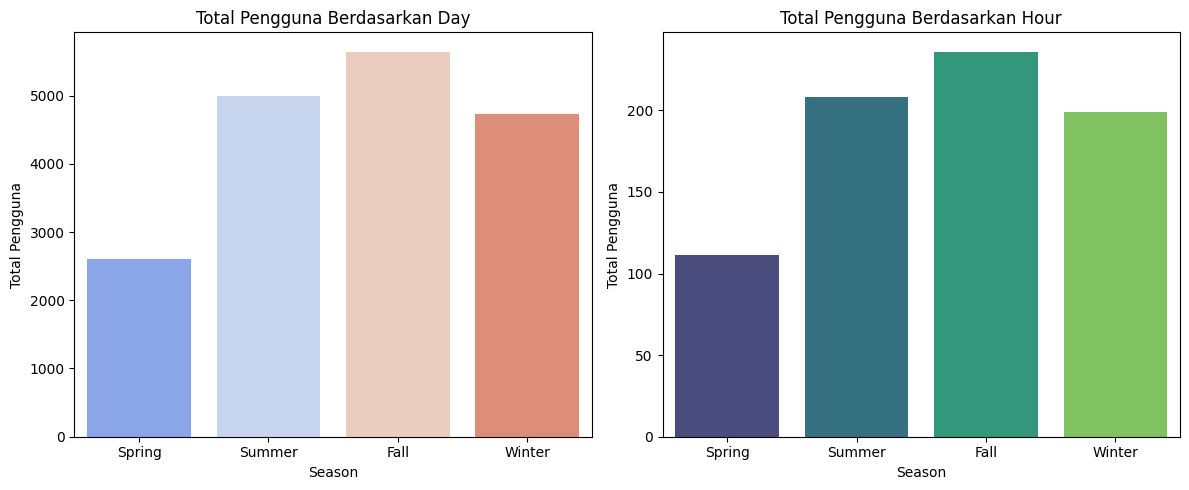

In [64]:
df_day = pd.DataFrame(day_df)
df_hour = pd.DataFrame(hour_df)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Total Pengguna Berdasarkan Day
sns.barplot(ax=axes[0], x="season", y="cnt", data=df_day, palette="coolwarm", ci=None)
axes[0].set_xlabel("Season")
axes[0].set_ylabel("Total Pengguna")
axes[0].set_title("Total Pengguna Berdasarkan Day")
axes[0].set_xticks([0, 1, 2, 3])
axes[0].set_xticklabels(["Spring", "Summer", "Fall", "Winter"])

#Total Pengguna Berdasarkan Hour
sns.barplot(ax=axes[1], x="season", y="cnt", data=df_hour, palette="viridis", ci=None)
axes[1].set_xlabel("Season")
axes[1].set_ylabel("Total Pengguna")
axes[1].set_title("Total Pengguna Berdasarkan Hour")
axes[1].set_xticks([0, 1, 2, 3])
axes[1].set_xticklabels(["Spring", "Summer", "Fall", "Winter"])

plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana tren pertumbuhan jumlah peminjaman oleh pengguna kasual dan terdaftar?

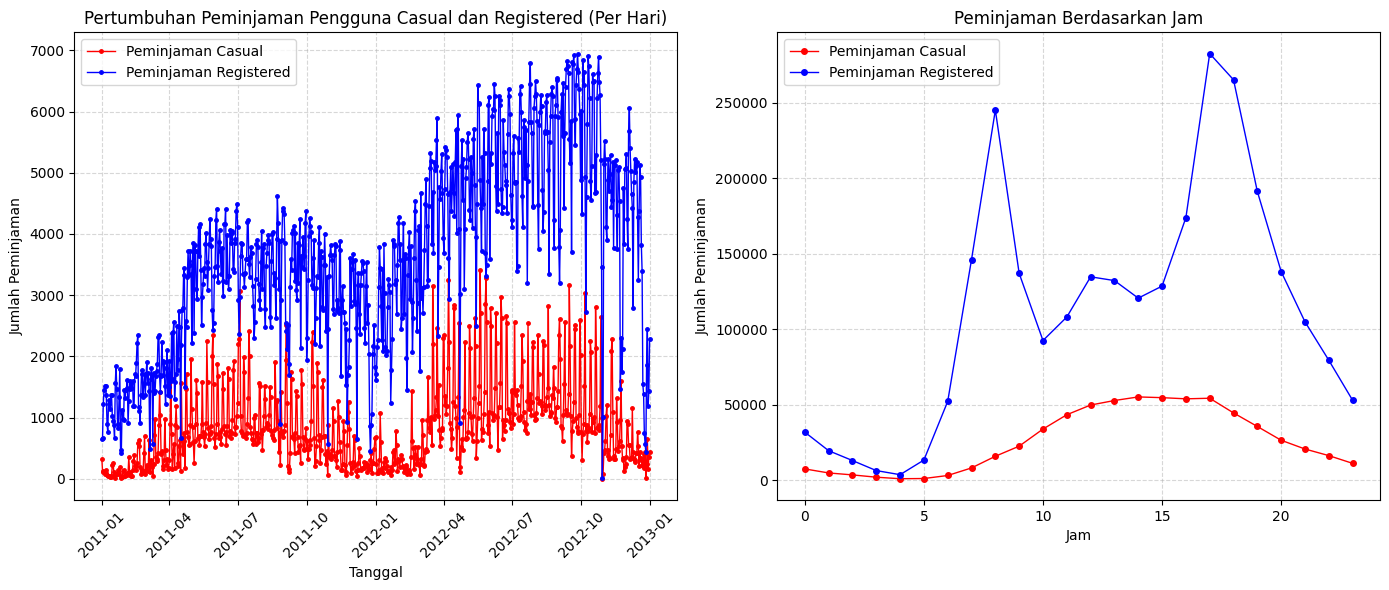

In [69]:
# Pastikan dteday bertipe datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Membuat subplots (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor='white')  # Hindari warna abu-abu

# Grafik line chart peminjaman berdasarkan hari
axes[0].plot(df_day['dteday'], df_day['casual'], label='Peminjaman Casual', color='red', marker='o', linestyle='-', linewidth=1, markersize=2.5)
axes[0].plot(df_day['dteday'], df_day['registered'], label='Peminjaman Registered', color='blue', marker='o', linestyle='-', linewidth=1, markersize=2.5)
axes[0].set_xlabel('Tanggal')
axes[0].set_ylabel('Jumlah Peminjaman')
axes[0].set_title('Peminjaman Berdasarkan Hari')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].tick_params(axis='x', rotation=45)

# Grafik line chart peminjaman berdasarkan jam
axes[1].plot(df_hour['hr'], df_hour['casual'], label='Peminjaman Casual', color='red', marker='o', linestyle='-', linewidth=1, markersize=4)
axes[1].plot(df_hour['hr'], df_hour['registered'], label='Peminjaman Registered', color='blue', marker='o', linestyle='-', linewidth=1, markersize=4)
axes[1].set_xlabel('Jam')
axes[1].set_ylabel('Jumlah Peminjaman')
axes[1].set_title('Peminjaman Berdasarkan Jam')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

# Atur tata letak agar lebih rapi
plt.tight_layout()
plt.show()


**Insight:**
- Pola Penggunaan Sepeda Setiap Musim
- Pola Pertumbuhan Peminjaman Casual vs Registered



## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1

Pola Musim menunjukkan pengaruh besar terhadap penggunaan sepeda, dengan musim semi dan panas memiliki lebih banyak peminjaman daripada musim gugur dan dingin.

- Conclution pertanyaan 2

Pola Pertumbuhan Peminjaman Pengguna Casual vs Registered menunjukkan bahwa pengguna registered secara keseluruhan lebih tinggi dan stabil dibandingkan dengan pengguna casual, yang memiliki jumlah peminjaman lebih rendah dan fluktuatif.



---


- Kesimpulan Akhir :

Berdasarkan analisis, pola penggunaan sepeda menunjukkan bahwa musim semi dan panas memiliki jumlah peminjamanyang lebih tinggi dibandingkan musim gugur dan dingin. Pengguna terdaftar (registered) menunjukkan tren yang lebih stabil dan tinggi dalam peminjaman dibandingkan dengan pengguna kasual (casual) yang memiliki grafik peminjaman relatif lebih rendah. Hal ini menunjukkan bahwa musim dan jenis pengguna sangat mempengaruhi tingkat peminjaman sepeda.
Dengan demikian, pemilik toko atau penyedia layanan sepeda dapat mempertimbangkan faktor musim dan jenis pengguna untuk merencanakan peminjaman dan operasional mereka.